<a href="https://colab.research.google.com/github/thessafuzaro/ANN/blob/main/Projeto_Thessa_versao_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
'''Primeiro projeto de redes neurais
Aluna: Thessa Fuzaro Mendes
Artigo: On the optimiation of froth flotation by the use of an artificial neural network [Al-Thyabat S]
Data: 26/05/2021'''

'Primeiro projeto de redes neurais\nAluna: Thessa Fuzaro Mendes\nArtigo: On the optimiation of froth flotation by the use of an artificial neural network [Al-Thyabat S]\nData: 26/05/2021'

In [255]:
#Bibliotecas necessárias
import os
import numpy as np   # biblioteca númerica do python
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 

#np.random.seed(0) #utilizado para parar no resultado desejado (não randomizar)

In [256]:
# para gerar o grafico no browser
%matplotlib inline

In [257]:
!git clone https://github.com/thessafuzaro/ANN
%cd ANN

Cloning into 'ANN'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 149 (delta 86), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (149/149), 246.14 KiB | 6.15 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/content/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN


In [258]:
# leitura dos dados
df=pd.read_csv("Dados_artigo_redes_neurais_atualizados.csv", delimiter=';')   # pelo pandas (pd) lê o arquivo no formato csv - arquivo de dados como o excel
print (df.head)

<bound method NDFrame.head of     No    Range  Mean_size  Collector_dosage  Impeller_speed  Recovery  Grade
0    1    16-32        750              0.90            1100     98.47  65.18
1    2   16-150        553              0.56            1200     92.71  65.36
2    3  150-270         79              0.67            1200     68.51  77.53
3    4   32-270        277              1.12            1200     93.90  52.68
4    5   24-270        380              0.90            1500     82.99  64.29
5    6   32-270        277              0.78            1200     95.69  62.93
6    7    16-24        854              0.90            1200     94.19  76.38
7    8   16-150        553              0.78            1500     66.15  67.67
8    9   24-270        380              1.12            1100     97.68  56.07
9   10   32-270        277              0.67            1200     98.13  60.60
10  11    16-24        854              1.12            1200     97.71  76.91
11  12   16-150        553        

In [259]:
#Selecionando as colunas de interesse:
Dat_Select=df.iloc[:,2:]

In [260]:
Dat_Select.head (5)

,Mean_size,Collector_dosage,Impeller_speed,Recovery,Grade
0,750,0.90,1100,98.47,65.18
1,553,0.56,1200,92.71,65.36
2,79,0.67,1200,68.51,77.53
3,277,1.12,1200,93.90,52.68
4,380,0.90,1500,82.99,64.29


In [261]:
# Separando o s  dados em normatizados e originais:
Index=[0,1,2]
X=Dat_Select.iloc[:,Index].copy()
print(X)
Y=Dat_Select.iloc[:,3:].copy()
print(Y)

    Mean_size  Collector_dosage  Impeller_speed
0         750              0.90            1100
1         553              0.56            1200
2          79              0.67            1200
3         277              1.12            1200
4         380              0.90            1500
5         277              0.78            1200
6         854              0.90            1200
7         553              0.78            1500
8         380              1.12            1100
9         277              0.67            1200
10        854              1.12            1200
11        553              0.78            1200
12        553              0.90            1200
13        553              1.01            1200
14        750              1.12            1200
15        553              0.90            1100
16        750              1.12            1100
17        553              1.12            1100
18        750              0.78            1500
19        277              0.90         

In [262]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.20, shuffle=True, random_state=42)

In [263]:
Scaler_X = preprocessing.MinMaxScaler((0,1)).fit(X)
Scaler_Y= preprocessing.MinMaxScaler((0,1)).fit(Y)

In [264]:
X_Train = Scaler_X.transform(X_Train)
X_Test = Scaler_X.transform(X_Test)
Y_Train = Scaler_Y.transform(Y_Train)
Y_Test= Scaler_Y.transform(Y_Test)

In [265]:
#Definindo a Rede Neural 
model = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5,max_iter=5000,
                     hidden_layer_sizes=(9,11),random_state=6)

In [266]:
#Treinando a Rede Neural
model.fit(X_Train, Y_Train)

MLPRegressor(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 11), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=6, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [267]:
# Usando a rede neural treina em calculos para treino e teste
Y_Calc_Train=model.predict(X_Train)
Y_Calc_Test=model.predict(X_Test)

In [268]:
#Transformando a saida da rede na forma original
Y_Obs_Train=Scaler_Y.inverse_transform(np.array(Y_Train).reshape(-1,2))
Y_Obs_Test=Scaler_Y.inverse_transform(np.array(Y_Test).reshape(-1,2))
Y_Calc_Train=Scaler_Y.inverse_transform(Y_Calc_Train.reshape(-1,2))
Y_Calc_Test=Scaler_Y.inverse_transform(Y_Calc_Test.reshape(-1,2))

In [269]:
#Separando a resposta Recovery para treino e teste dos dados observados e calculados
Y_Obs_Train_Recovery=Y_Obs_Train[:,0]
Y_Obs_Test_Recovery=Y_Obs_Test[:,0]
Y_Calc_Train_Recovery=Y_Calc_Train[:,0]
Y_Calc_Test_Recovery=Y_Calc_Test[:,0]

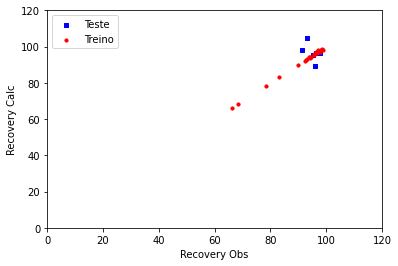

In [270]:
# Expressando os dois dados em figura para a resposta Recovery
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(Y_Obs_Test_Recovery, Y_Calc_Test_Recovery, s=10, c='b', marker="s", label='Teste')
ax1.scatter(Y_Obs_Train_Recovery, Y_Calc_Train_Recovery, s=10, c='r', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.xlim([0,120])
plt.ylim([0,120])
plt.ylabel('Recovery Calc')
plt.xlabel('Recovery Obs')
plt.show()

In [271]:
MSE_Test_Recovery=mean_squared_error(Y_Obs_Test_Recovery,Y_Calc_Test_Recovery)
print("MSE Recovery Teste=",MSE_Test_Recovery)
R2_Test_Recovery=r2_score(Y_Obs_Test_Recovery,Y_Calc_Test_Recovery)
print("R^2 Teste=",R2_Test_Recovery)

MSE Recovery Teste= 31.765273184650596
R^2 Teste= -5.460644139332036


In [272]:
MSE_Train_Recovery=mean_squared_error(Y_Obs_Train_Recovery,Y_Calc_Train_Recovery)
print("MSE Treino=",MSE_Train_Recovery)
R2_Train_Recovery=r2_score(Y_Obs_Train_Recovery,Y_Calc_Train_Recovery)
print("R^2 Treino=",R2_Train_Recovery)

MSE Treino= 0.11533629930637032
R^2 Treino= 0.9983530811232821


In [273]:
#Separando a resposta Grade para treino e teste dos dados observados e calculados
Y_Obs_Train_Grade=Y_Obs_Train[:,1]
Y_Obs_Test_Grade=Y_Obs_Test[:,1]
Y_Calc_Train_Grade=Y_Calc_Train[:,1]
Y_Calc_Test_Grade=Y_Calc_Test[:,1]

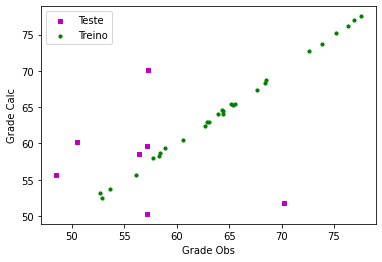

In [274]:
# Expressando os dois dados em figura (Grade)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Y_Obs_Test_Grade,Y_Calc_Test_Grade, s=10, c='m', marker="s", label='Teste')
ax1.scatter(Y_Obs_Train_Grade,Y_Calc_Train_Grade, s=10, c='g', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.ylabel('Grade Calc')
plt.xlabel('Grade Obs')
plt.show()

In [275]:
MSE_Grade_Test=mean_squared_error(Y_Obs_Test_Grade,Y_Calc_Test_Grade)
print("MSE Grade Teste=",MSE_Grade_Test)
R2_Grade_Test=r2_score(Y_Obs_Test_Grade,Y_Calc_Test_Grade)
print("R^2 Grade Teste=",R2_Grade_Test)

MSE Grade Teste= 101.32867242869415
R^2 Grade Teste= -1.4429551038162707


In [276]:
MSE_Grade_Train=mean_squared_error(Y_Obs_Train_Grade,Y_Calc_Train_Grade)
print("MSE Grade Treino=",MSE_Grade_Train)
R2_Grade_Train=r2_score(Y_Obs_Train_Grade,Y_Calc_Train_Grade)
print("R^2 Grade Treino=",R2_Grade_Train)

MSE Grade Treino= 0.061996775032290896
R^2 Grade Treino= 0.9987760427954312
